# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="E:\GIT_ROOT\collaboration-tennis\Tennis_Windows_x86_64\Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


In [5]:
brain.vector_observation_space_size*brain.num_stacked_vector_observations

24

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.09000000171363354


When finished, you can close the environment.

In [7]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [15]:
%reload_ext autoreload
%autoreload 2
random_seed = 0
from MultiAgent import MADDPG

agent = MADDPG(state_size, action_size, num_agents, random_seed)


In [9]:
target = 0.5

In [10]:
def train(n_episodes=15000, max_t=1000, print_every=100,save_every=300):
    """
    Multi Agent DDPG Algorithm.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        print_every (int): frequency of printing information throughout iteration """
    
    
    std_2=[]
    average_2 = []
    scores_2 = []
    scores_deque = deque(maxlen=print_every)
    reached_target = False
    
    for i_episode in range(1, n_episodes+1):
        scores = np.zeros(num_agents)
        env_info = env.reset(train_mode=True)[brain_name]
        #agent.reset()
        states = env_info.vector_observations            # get the current state
        
        
        while True:

            actions = agent.act(states, add_noise=False)
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations   # get the next state
            rewards = env_info.rewards                   # get the reward
            dones = env_info.local_done                  # see if episode has finished        
            agent.step(states, actions, rewards, next_states, dones)
             # take step with agent (including learning)
            scores += rewards                                # update the score
            
            states = next_states                             # roll over the state to next time step
            if np.any(dones):                                       # exit loop if episode finished
                break
        # Since we have multiple agentsthe score will be max score
        score = np.max(scores)
        scores_deque.append(score)       # save most recent score
        scores_2.append(score)
        scores_avg = np.mean(scores_deque)
        scores_std = np.std(scores_deque)
        average_2.append(scores_avg)
        std_2.append(scores_std)
        

        print('\rEpisode {}\tAverage Score: {:.5f}'.format(i_episode, np.mean(scores_deque)), end="")
        
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.5f}'.format(i_episode, np.mean(scores_deque)))
            if i_episode % save_every == 0:
                for i in range(num_agents):
                    torch.save(agent[i].actor_local.state_dict(), 'checkpoint_actor_player{}.pth'.format(i+1))
                    torch.save(agent[i].critic_local.state_dict(), 'checkpoint_critic_player{}.pth'.format(i+1))

        if scores_avg>=target:
            if not reached_target:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.5f}'.format(i_episode, scores_avg))
                reached_target = True
            for i in range(num_agents):
                torch.save(agent[i].actor_local.state_dict(), 'checkpoint_actor_player{}.pth'.format(i+1))
                torch.save(agent[i].critic_local.state_dict(), 'checkpoint_critic_player{}.pth'.format(i+1))
            break    
        
            
        
    
            
    return scores_2,average_2,std_2

In [16]:
%%time
scores_2,average_2,std_2 = train()

Episode 100	Average Score: 0.00300
Episode 200	Average Score: 0.00460
Episode 300	Average Score: 0.00990
Episode 400	Average Score: 0.00500
Episode 500	Average Score: 0.00500
Episode 600	Average Score: 0.00000
Episode 700	Average Score: 0.00100
Episode 800	Average Score: 0.00000
Episode 900	Average Score: 0.00000
Episode 1000	Average Score: 0.00000
Episode 1100	Average Score: 0.00000
Episode 1200	Average Score: 0.00000
Episode 1300	Average Score: 0.00000
Episode 1400	Average Score: 0.00000
Episode 1500	Average Score: 0.00000
Episode 1600	Average Score: 0.00000
Episode 1700	Average Score: 0.00000
Episode 1800	Average Score: 0.00000
Episode 1900	Average Score: 0.00000
Episode 2000	Average Score: 0.00000
Episode 2100	Average Score: 0.00000
Episode 2200	Average Score: 0.00000
Episode 2300	Average Score: 0.00000
Episode 2400	Average Score: 0.00000
Episode 2500	Average Score: 0.00000
Episode 2600	Average Score: 0.00000
Episode 2700	Average Score: 0.00000
Episode 2800	Average Score: 0.00000
E

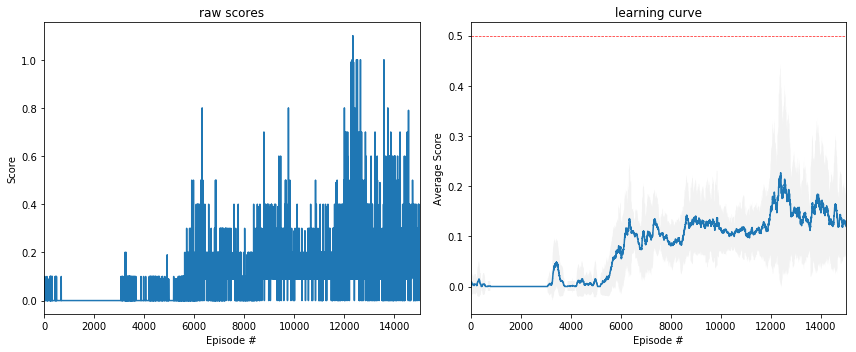

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

values = np.array(scores_2)
averages = np.array(average_2)
std = np.array(std_2)

# plot the scores
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=False)

# plot the sores by episode
ax1.plot(np.arange(len(values)), values)
ax1.set_xlim(0, len(values)+1)
ax1.set_ylabel('Score')
ax1.set_xlabel('Episode #')
ax1.set_title('raw scores')

# plot the average of these scores
ax2.axhline(y=0.5, xmin=0.0, xmax=1.0, color='r', linestyle='--', linewidth=0.7, alpha=0.9)
ax2.plot(np.arange(len(averages)), averages)
ax2.fill_between(np.arange(len(averages)), averages+std, averages-std, facecolor='gray', alpha=0.1)
ax2.set_ylabel('Average Score')
ax2.set_xlabel('Episode #')
ax2.set_title('learning curve')

f.tight_layout()